# Data Preparation for Newspaper

## Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import os
import fnmatch
from matplotlib.image import imread
import cv2
from PIL import Image
#from skimage.transform import resize

## Data: Newspaper Images

### Number of images and rezising shape

In [2]:
# Function to count the number of images on a directory and subdirectory

def find_files(directory, pattern):
    for root, dirs, files in os.walk(directory):
        for basename in files:
            if fnmatch.fnmatch(basename, pattern):
                filename = os.path.join(root, basename)
                yield filename

jpg_counter = 0
for filename in find_files('Diario La Republica', '*.jpg'):
    jpg_counter += 1

print("Cantidad de archivos .jpg en la carpeta 'Diario La Republica':", jpg_counter)


Cantidad de archivos .jpg en la carpeta 'Diario La Republica': 8121


- The heights and widths of the pages were not the same for all. However, they were all between 6038 and 4756.
- This is still too much, so we define a specific **height(altura)** and **width(ancho)**.

In [3]:
# Reference shape for resizing
altura_px_ref = 1040
ancho_px_ref = 820

### Directory to save all the images and masks

In [4]:
os.makedirs('Data/images', exist_ok=True)
os.makedirs('Data/masks', exist_ok=True)

### Transfer and resizing of images

- The original dataset of images is saved in a directory with several subdirectories based on the date (year, month, day) of publication of the page.
- Everything will be **resized and transferred to Data/images**.

In [77]:
redo = False

In [78]:
if redo:

    for filename in find_files('Data/images/', '*.jpg'):
        os.remove(filename)

    for filename in find_files('Diario La Republica', '*.jpg'):

        # Obtenemos los nombres de las carpetas que contienen el archivo
        folders = []
        for folder in filename.split("/"):
            folders.append(folder)


        # Guardamos las partes relevantes
        year = folders[1]
        month = folders[2]
        day = folders[3]
        page_number = folders[5]

        # Definimos el nuevonombre de la imagen
        image_name = year + '-' + month + '-' + day + '-' + page_number

        # Cargamos la imagen
        image = imread(filename)

        # Redimensionamos la imagen
        image = cv2.resize(image, (ancho_px_ref, altura_px_ref))

        # Guardamos la imagen
        plt.imsave('Data/images/' + image_name, image)


## Data: Articles in Excel

In [7]:
# Lectura del dataset
#file_name = "Data - Medio La República.xlsx" # Too much nulls in target "Seccion"
file_name = "Data V2..0.xlsx"

sheet_name = "Hoja1"

dataset = pd.read_excel(file_name, sheet_name)
print('Se leyo el archivo "'+ file_name +'" con exito')
print('Dimensiones del dataset: ', dataset.shape)

Se leyo el archivo "Data V2..0.xlsx" con exito
Dimensiones del dataset:  (55270, 18)


/tmp/ipykernel_3273452/171052881.py:7: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  dataset = pd.read_excel(file_name, sheet_name)


In [8]:
dataset.head()

,ID_archivo_multimedia,Medio,ProgramaSeccion,Pagina,Seccion,TITULO,RESUMEN,fec_emision,fec_registro,ruta,Archivo,num_coord_x,num_coord_y,num_ancho_pixel,num_ancho_cm,num_alto_cm,num_alto_pixel,Unnamed: 17
0,21344082,La República,La República,p6,Política,NaN,NaN,2022-11-22 00:00:00,2022-11-22 06:32:00,2022\11\22,71121344082,41,513,250.0,8.81,18.20,516.0,NaN
1,21344076,La República,La República,p7,Política,Aviso -Cálidda,"1,5 millones de familias conectadas al progreso",2022-11-22 00:00:00,2022-11-22 06:31:00,2022\11\22,97021344076,27,519,749.0,26.42,17.39,493.0,NaN
2,21344066,La República,La República,p6,Política,Aviso - Sunarp,Rectificación de aviso,2022-11-22 00:00:00,2022-11-22 06:30:00,2022\11\22,34921344066,294,733,247.0,8.71,9.98,283.0,NaN
3,21344021,La República,La República,p1,Portada,NaN,NaN,2022-11-22 00:00:00,2022-11-22 06:23:00,2022\11\22,16421344021,48,1652,305.0,5.37,7.60,431.0,NaN
4,21344018,La República,La República,p1,Portada,NaN,NaN,2022-11-22 00:00:00,2022-11-22 06:23:00,2022\11\22,60721344018,43,1429,920.0,16.22,4.00,227.0,NaN


## Interpretation of columns (variables)

In [9]:
# Columnas del dataset y sus tipos de datos
dataset.dtypes

ID_archivo_multimedia             int64
Medio                            object
ProgramaSeccion                  object
Pagina                           object
Seccion                          object
TITULO                           object
RESUMEN                          object
fec_emision                      object
fec_registro             datetime64[ns]
ruta                             object
Archivo                          object
num_coord_x                       int64
num_coord_y                       int64
num_ancho_pixel                 float64
num_ancho_cm                    float64
num_alto_cm                     float64
num_alto_pixel                  float64
Unnamed: 17                     float64
dtype: object

- **ID_archivo_multimedia**: Unique identifier of the news article.
- **Medio**: Peruvian national newspaper where the news article is found.
- **ProgramaSeccion**: Same value as "Medio".
- **Pagina**: Page on which the news article is located.
- **Seccion**: Section to which the news article belongs. (Target)
- **TITULO**: Article title.
- **RESUMEN**: Article body.
- **fec_emision**: Day on which the newspaper to which the article belongs was issued.
- **fec_registro**: Day on which the newspaper to which the article belongs was registered.
- **ruta**: Internal path where the cover page where the article is located is located.
- **Archivo**: Identifier of the file that represents the article.
- **num_coord_x**: X coordinate that references a corner of the article.
- **num_coord_y**: Y coordinate that references a corner of the article.
- **num_ancho_pixel**: Width of the article in pixels.
- **num_ancho_cm**: Width of the item in centimeters.
- **num_alto_cm**: Height of the item in centimeters.
- **num_alto_pixel**: Height of the item in pixels.
- **Unnamed**: Unknown.

The variables needed to create the masks are:

- **Pagina**
- **Seccion**
- **ruta**
- **num_coord_x**
- **num_coord_y**
- **num_ancho_pixel**
- **num_alto_pixel**

In [10]:
columns = ['Pagina', 'Seccion', 'ruta', 
           'num_coord_x', 'num_coord_y', 'num_ancho_pixel', 'num_alto_pixel']

# Eliminamos las columnas que no son de interés
dataset = dataset[columns]


In [11]:
dataset.head()

,Pagina,Seccion,ruta,num_coord_x,num_coord_y,num_ancho_pixel,num_alto_pixel
0,p6,Política,2022\11\22,41,513,250.0,516.0
1,p7,Política,2022\11\22,27,519,749.0,493.0
2,p6,Política,2022\11\22,294,733,247.0,283.0
3,p1,Portada,2022\11\22,48,1652,305.0,431.0
4,p1,Portada,2022\11\22,43,1429,920.0,227.0


- "Sección": Is the target value, a number is given to each class, and the least significant classes are grouped into the same number.

In [12]:
dataset['Seccion'] = dataset['Seccion'].str.lower()

In [13]:
dataset['Seccion'].value_counts()

opinión           9248
política          7478
portada           5570
economía          5074
sociedad          4263
en portada        1735
deportes          1110
mundo              860
ocio y cultura     859
especial           623
tema del día       568
aviso              408
editorial          307
entrevista          61
la contra           53
publireportaje      22
judicial            21
medio ambiente      15
actualidad           3
perú radar           1
Name: Seccion, dtype: int64

In [14]:
# Guarda en una lista todas las secciones sin repetir ordenadas por orden de frecuencia
secciones = dataset['Seccion'].value_counts().index.tolist()
secciones

['opinión',
 'política',
 'portada',
 'economía',
 'sociedad',
 'en portada',
 'deportes',
 'mundo',
 'ocio y cultura',
 'especial',
 'tema del día',
 'aviso',
 'editorial',
 'entrevista',
 'la contra',
 'publireportaje',
 'judicial',
 'medio ambiente',
 'actualidad',
 'perú radar']

In [15]:
# crea una lista de 1 a n, donde n es la cantidad de secciones
secciones_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
secciones_num

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [16]:
# Obtenemos las secciones únicas ordenadas por frecuencia
dataset['Seccion_num'] = dataset['Seccion']
dataset['Seccion_num'].replace(secciones,
                        secciones_num, inplace=True)

In [17]:
dataset.head()

,Pagina,Seccion,ruta,num_coord_x,num_coord_y,num_ancho_pixel,num_alto_pixel,Seccion_num
0,p6,política,2022\11\22,41,513,250.0,516.0,2.0
1,p7,política,2022\11\22,27,519,749.0,493.0,2.0
2,p6,política,2022\11\22,294,733,247.0,283.0,2.0
3,p1,portada,2022\11\22,48,1652,305.0,431.0,3.0
4,p1,portada,2022\11\22,43,1429,920.0,227.0,3.0


## Functions for article extraction

In [21]:
def get_coordinates(row):

    factor = 1

    x = row['num_coord_x'] * factor
    y = row['num_coord_y'] * factor
    width = row['num_ancho_pixel'] * factor
    height = row['num_alto_pixel'] * factor
    color = row['Seccion_num']

    threshold = 0.05

    # Note: Some of the coordinates and positions are double it's size, so we divide them by 2
    if x+width > ancho_px_ref*(1+threshold) or y+height > altura_px_ref*(1+threshold):
        x /= 2
        y /= 2
        width /= 2
        height /= 2

    return x, y, width, height, color

In [22]:
def extract_article(dataset, row):

    # Ruta del dataset
    route = dataset['ruta'].iloc[row]

    # Cambio del formato de la ruta, se reemplaza los '\' por '-'
    route = route.replace('\\', '-')

    # Ruta relativa
    relative_route = 'Data/images/' + route + '-' + dataset['Pagina'].iloc[row] + '.jpg'
    print(relative_route)

    image = imread(relative_route)

    Px, Py, anchopx, altopx, color = get_coordinates(dataset.iloc[row])

    print(Px, Py, anchopx, altopx, color)

    section_image = image[math.floor(Py):math.floor(Py+altopx), math.floor(Px):math.floor(Px+anchopx)]

    return section_image

## Data preprocessing

### Null Evaluation

In [23]:
# Porcentaje de filas (registros) vacías por cada columna (variable). Cuanto más cercano el valor a 1 significa que tiene más filas (registros) vacías
dataset.isna().sum() / len(dataset)

Pagina             0.000000
Seccion            0.307418
ruta               0.000018
num_coord_x        0.000000
num_coord_y        0.000000
num_ancho_pixel    0.000000
num_alto_pixel     0.000434
Seccion_num        0.307418
dtype: float64

In [24]:
dataset = dataset.dropna()

### Path evaluation

In [25]:
# A los objetos tipo 'Object' le damos propiedades de tipo 'String'
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        dataset[col] = dataset[col].astype(str)

For **Pagina** (page number), a length of 2 or 3 is acceptable, as it encompasses 'pX' and 'p1X'.
  - Ex.: p11

In [26]:
# Find the value counts of the lenght of the strings in the column "ruta"
dataset['Pagina'].apply(lambda x: len(x)).value_counts()

3    20879
2    17382
Name: Pagina, dtype: int64

For **ruta** (path), the only accepted length is 10, as it spans '20XX/XX/XX'.
   - Ex.: 2022/01/02

In [27]:
# Find the value counts of the lenght of the strings in the column "ruta"
dataset['ruta'].apply(lambda x: len(x)).value_counts()

10    38257
19        4
Name: ruta, dtype: int64

In [28]:
# Muestra todos los registros que tengan una longitud diferente de 10 en la columna "ruta"
dataset[dataset['ruta'].apply(lambda x: len(x) != 10)]

,Pagina,Seccion,ruta,num_coord_x,num_coord_y,num_ancho_pixel,num_alto_pixel,Seccion_num
10811,p9,opinión,2022-04-25 05:05:00,32919815222,25,58.0,11.60,1.0
17129,p14,opinión,2021-12-19 05:46:00,14218989083,17,651.0,12.98,1.0
27221,p9,opinión,2021-06-13 04:39:00,27717712908,34,61.0,34.11,1.0
35944,p14,opinión,2020-12-22 04:08:00,57316604610,34,680.0,12.02,1.0


We notice that it has another date format, so we adjust the value.

In [29]:
# Modificamos el formato de la columna "ruta" para que tenga una longitud de 10 caracteres (recortamos)
dataset['ruta'] = dataset['ruta'].apply(lambda x: x[:10])

# Reemplazamos '-' por '\' en la columna "ruta"
dataset['ruta'] = dataset['ruta'].apply(lambda x: x.replace('-', '\\'))


In [30]:
dataset['ruta'].apply(lambda x: len(x)).value_counts()

10    38261
Name: ruta, dtype: int64

### Evaluation of article size and position

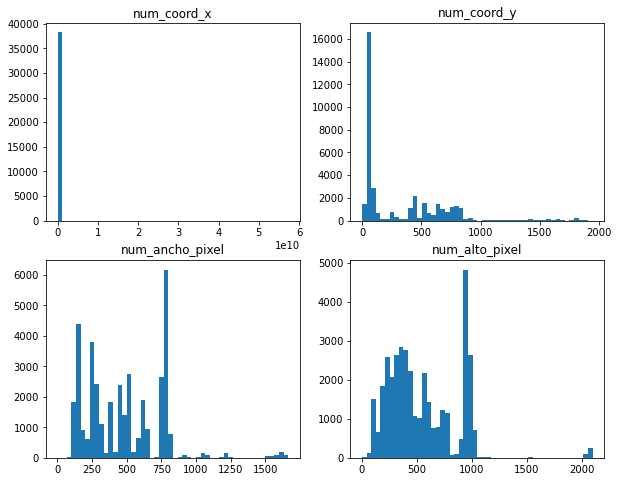

In [31]:
histogram_columns = ['num_coord_x', 'num_coord_y', 'num_ancho_pixel', 'num_alto_pixel']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, col in enumerate(histogram_columns):
    axs[i//2, i%2].hist(dataset[col], bins=50)
    axs[i//2, i%2].set_title(col)

plt.show()

#### Negative values

In [32]:
# Muestra en un dataframe los valores negativos de las columnas en histogram_columns
negative_values = dataset[dataset[histogram_columns].apply(lambda x: (x < 0).any(), axis=1)]
negative_values

,Pagina,Seccion,ruta,num_coord_x,num_coord_y,num_ancho_pixel,num_alto_pixel,Seccion_num
11283,p1,portada,2022\04\15,0,-1,1609.0,2092.0,3.0
11334,p1,portada,2022\04\14,0,-1,1622.0,2092.0,3.0
13020,p1,portada,2022\03\11,0,-1,1609.0,2092.0,3.0
15170,p1,portada,2022\01\29,0,-1,1590.0,2092.0,3.0


It can be seen that they are **Covers** (portada), and whose width and height show their size, so the **negative in num_coord_y can be equivalent to a 0**

Since there is little data, the extracted polygons will be extracted and evaluated.

In [33]:
# Convertimos la columna num_coord_y a 0
negative_values.loc[negative_values['num_coord_y'] < 0, 'num_coord_y'] = 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Data/images/2022-04-15-p1.jpg
0.0 0.0 804.5 1046.0 3.0
Data/images/2022-04-14-p1.jpg
0.0 0.0 811.0 1046.0 3.0
Data/images/2022-03-11-p1.jpg
0.0 0.0 804.5 1046.0 3.0
Data/images/2022-01-29-p1.jpg
0.0 0.0 795.0 1046.0 3.0


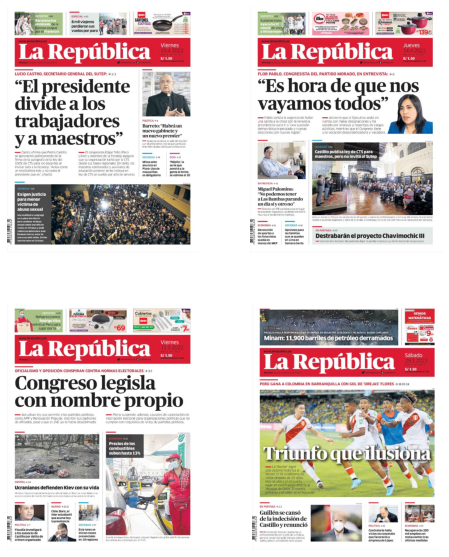

In [34]:
# Mostramos las imágenes de negative_values en un subplot 2x2
fig, axs = plt.subplots(2, 2, figsize=(8, 10))

for i in range(4):
    section_image = extract_article(negative_values, i)
    axs[i//2, i%2].imshow(section_image)
    axs[i//2, i%2].axis('off')

plt.show()

The polygons were extracted correctly, so the change is maintained.

In [47]:
# Aplicamos el cambio al dataset original
dataset.loc[dataset['num_coord_y'] < 0, 'num_coord_y'] = 0

# Liberamos memoria
del negative_values

#### Outliers

Based on the **histogram of num_cord_x** it can be seen that there are few very high values.

In [35]:
# Obtenemos los valores inconsistentes de la columna num_coord_x
inconsistent_values = dataset[dataset['num_coord_x'] > 1500]
inconsistent_values

,Pagina,Seccion,ruta,num_coord_x,num_coord_y,num_ancho_pixel,num_alto_pixel,Seccion_num
10811,p9,opinión,2022\04\25,32919815222,25,58.0,11.60,1.0
17129,p14,opinión,2021\12\19,14218989083,17,651.0,12.98,1.0
27221,p9,opinión,2021\06\13,27717712908,34,61.0,34.11,1.0
35944,p14,opinión,2020\12\22,57316604610,34,680.0,12.02,1.0


In [38]:
# Obtenemos los valores inconsistentes de la columna num_coord_x (incluye los numero muy altos)
inconsistent_values = dataset[dataset['num_coord_x'] > ancho_px_ref*5.9*2 * (1+0.05)]
inconsistent_values


,Pagina,Seccion,ruta,num_coord_x,num_coord_y,num_ancho_pixel,num_alto_pixel,Seccion_num
10811,p9,opinión,2022\04\25,32919815222,25,58.0,11.60,1.0
17129,p14,opinión,2021\12\19,14218989083,17,651.0,12.98,1.0
27221,p9,opinión,2021\06\13,27717712908,34,61.0,34.11,1.0
35944,p14,opinión,2020\12\22,57316604610,34,680.0,12.02,1.0


In [40]:
dataset = dataset[dataset['num_coord_x'] < ancho_px_ref*5.9*2 * (1+0.05)]

### Extraction tests

Data/images/2022-11-22-p6.jpg
41 513 250.0 516.0 2.0
Data/images/2022-11-22-p7.jpg
27 519 749.0 493.0 2.0
Data/images/2022-11-22-p6.jpg
294 733 247.0 283.0 2.0
Data/images/2022-11-22-p1.jpg
24.0 826.0 152.5 215.5 3.0


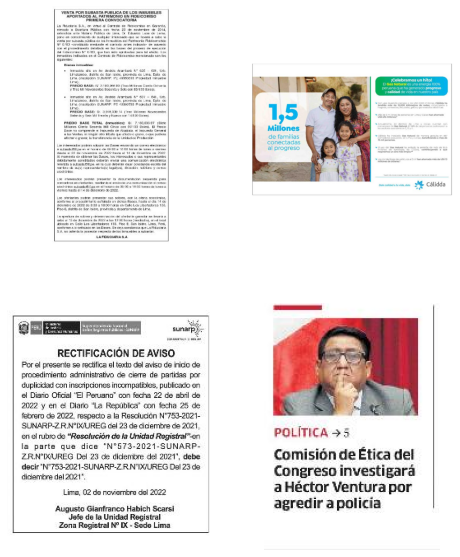

In [41]:
# Mostramos las imágenes de negative_values en un subplot 2x2
fig, axs = plt.subplots(2, 2, figsize=(8, 10))

# 

for i in range(4):
    section_image = extract_article(dataset.head(4), i)
    axs[i//2, i%2].imshow(section_image)
    axs[i//2, i%2].axis('off')

plt.show()

# Mask generation

In [45]:
dataset.head()

,Pagina,Seccion,ruta,num_coord_x,num_coord_y,num_ancho_pixel,num_alto_pixel,Seccion_num
0,p6,política,2022\11\22,41,513,250.0,516.0,2.0
1,p7,política,2022\11\22,27,519,749.0,493.0,2.0
2,p6,política,2022\11\22,294,733,247.0,283.0,2.0
3,p1,portada,2022\11\22,48,1652,305.0,431.0,3.0
4,p1,portada,2022\11\22,43,1429,920.0,227.0,3.0


In [52]:
def get_path(row, path_type):

    path = row['ruta']
    path = path.replace('\\', '-')

    relative_path = path + '-' + str(row['Pagina']) + path_type

    return relative_path

In [79]:
redo = False

In [80]:
if redo:

    for filename in find_files('Data/masks', '*.npy'):
        os.remove(filename)

    for index, row in dataset.iterrows():

        # Image path
        image_path = 'Data/images/' + get_path(row, '.jpg')
        mask_path = 'Data/masks/' + get_path(row, '.npy')
        print(str(index) + ': ' + image_path)

        # Verify if the image exists
        if not os.path.exists(image_path):
            print('   No existe la ruta:', image_path)
            continue

        # Coordinates of the article
        Px, Py, anchopx, altopx, class_num = get_coordinates(row)
        
        if Px+anchopx > ancho_px_ref*(1+0.0) or Py+altopx > altura_px_ref*(1+0.0):
            print('   Las coordenadas exceden las dimensiones de la imagen')
            continue
        
        if not os.path.exists(mask_path):

            # Crea un arreglo de ceros (llamado new_mask) con las dimensiones de la portada
            new_mask = np.zeros((altura_px_ref, ancho_px_ref)).astype(np.uint8)

            # Modifica new_mask en base a Px, Py, anchopx, altopx y class_num
            new_mask[math.floor(Py):math.floor(Py+altopx), math.floor(Px):math.floor(Px+anchopx)] = class_num

            # Guarda new_mask en la carpeta "Portadas/mascaras" con el nombre de la ruta relativa
            np.save(mask_path, new_mask)
        
        else:
            located_mask = np.load(mask_path, mmap_mode='r+')

            # Modifica located_mask en base a Px, Py, anchopx, altopx y class_num
            located_mask[math.floor(Py):math.floor(Py+altopx), math.floor(Px):math.floor(Px+anchopx)] = class_num


## Filtration of valid masks

- The most complete masks are copied to a folder called "valid".
- Take into account that all masks must have class '0' because there are parts where there are no articles. Therefore, you cannot set a threshold of 0

In [87]:
os.makedirs('valid/masksNPY', exist_ok=True)

In [81]:
redo = False

### Filtration

In [82]:
#  Copiamos todas las máscaras válidas a otra carpeta y le aplicamos un resize
if redo:

    for filename in find_files('valid/masksNPY', '*.npy'):
        os.remove(filename)

    for mask_path in find_files('Data/masks/', '*.npy'):

        with open(mask_path, 'rb') as f:
            mask = np.load(f)

        threshold = 0.3

        # Contamos el % de 0's en la máscara
        porcentage = np.count_nonzero(mask == 0) / mask.size

        if porcentage < threshold:

            # Definimos el nuevo nombre del archivo
            mask_npy_save = mask_path.replace('Data','valid').replace('masks', 'masksNPY')

            print(mask_npy_save)

            np.save(mask_npy_save, mask)


### Copy of their respective images

In [83]:
if redo:

    for filename in find_files('valid/images', '*.jpg'):
        os.remove(filename)

    for filename in find_files('valid/masksNPY', '*.npy'):

        print(filename)

        # Nombre de la portada a buscar
        portada_search = filename.replace('valid/masksNPY', 'Data/images').replace('.npy', '.jpg')

        # Nombre de la portada a guardar
        portada_save = filename.replace('masksNPY', 'images').replace('.npy', '.jpg')


        if os.path.exists(portada_search):

            image = imread(portada_search)

            plt.imsave(portada_save, image)
        else:
            print('No existe la portada:', portada_search)


valid/masksNPY/2022-02-16-p14.npy
valid/masksNPY/2022-10-12-p5.npy
valid/masksNPY/2022-03-17-p8.npy
valid/masksNPY/2022-04-06-p1.npy
valid/masksNPY/2022-11-07-p9.npy
valid/masksNPY/2022-01-25-p7.npy
valid/masksNPY/2022-03-23-p13.npy
valid/masksNPY/2022-05-16-p13.npy
valid/masksNPY/2022-08-07-p14.npy
valid/masksNPY/2022-09-16-p17.npy
valid/masksNPY/2022-01-25-p1.npy
valid/masksNPY/2022-08-11-p15.npy
valid/masksNPY/2022-07-06-p15.npy
valid/masksNPY/2022-09-01-p15.npy
valid/masksNPY/2022-07-05-p9.npy
valid/masksNPY/2022-11-14-p2.npy
valid/masksNPY/2022-02-25-p22.npy
valid/masksNPY/2022-09-23-p3.npy
valid/masksNPY/2022-08-23-p5.npy
valid/masksNPY/2022-03-31-p1.npy
valid/masksNPY/2022-08-12-p24.npy
valid/masksNPY/2022-10-31-p9.npy
valid/masksNPY/2022-09-10-p4.npy
valid/masksNPY/2022-04-04-p1.npy
valid/masksNPY/2022-03-22-p9.npy
valid/masksNPY/2022-04-06-p16.npy
valid/masksNPY/2022-07-29-p8.npy
valid/masksNPY/2022-07-28-p15.npy
valid/masksNPY/2022-10-17-p13.npy
valid/masksNPY/2022-03-26-p9.n

## Separation of train and test

In [89]:
os.makedirs('train/masksNPY', exist_ok=True)
os.makedirs('train/images', exist_ok=True)
os.makedirs('test/masksNPY', exist_ok=True)
os.makedirs('test/images', exist_ok=True)

In [ ]:
valid_masks_counter = 0
for filename in find_files('valid/masksNPY', '*.npy'):
    valid_masks_counter += 1

In [90]:
for_testing = int(0.1 * valid_masks_counter)
for_testing

396

In [106]:
redo = False

In [100]:
# Save a copy for the first "for_testing" files from the directory "valid" to the directory "test"

if redo:

    for filename in find_files('test/masksNPY', '*.npy'):
        os.remove(filename)
    for filename in find_files('test/images', '*.jpg'):
        os.remove(filename)

    counter = for_testing
    for filename in find_files('valid/masksNPY', '*.npy'):

        if counter == 0:
            break

        counter -= 1

        print('Reading from ...')
        mask_load_name = filename
        portada_load_name = filename.replace('valid/masksNPY', 'Data/images').replace('.npy', '.jpg')

        print(mask_load_name)
        print(portada_load_name)

        mask_save = mask_load_name.replace('valid', 'test')
        portada_save = mask_load_name.replace('valid/masksNPY', 'test/images').replace('.npy', '.jpg')

        print('Saving in ...')
        print(mask_save)
        print(portada_save)
        print()
        
        np.save(mask_save, np.load(mask_load_name))
        plt.imsave(portada_save, imread(portada_load_name))

Reading from ...
valid/masksNPY/2022-02-16-p14.npy
Data/images/2022-02-16-p14.jpg
Saving in ...
test/masksNPY/2022-02-16-p14.npy
test/images/2022-02-16-p14.jpg

Reading from ...
valid/masksNPY/2022-10-12-p5.npy
Data/images/2022-10-12-p5.jpg
Saving in ...
test/masksNPY/2022-10-12-p5.npy
test/images/2022-10-12-p5.jpg

Reading from ...
valid/masksNPY/2022-03-17-p8.npy
Data/images/2022-03-17-p8.jpg
Saving in ...
test/masksNPY/2022-03-17-p8.npy
test/images/2022-03-17-p8.jpg

Reading from ...
valid/masksNPY/2022-04-06-p1.npy
Data/images/2022-04-06-p1.jpg
Saving in ...
test/masksNPY/2022-04-06-p1.npy
test/images/2022-04-06-p1.jpg

Reading from ...
valid/masksNPY/2022-11-07-p9.npy
Data/images/2022-11-07-p9.jpg
Saving in ...
test/masksNPY/2022-11-07-p9.npy
test/images/2022-11-07-p9.jpg

Reading from ...
valid/masksNPY/2022-01-25-p7.npy
Data/images/2022-01-25-p7.jpg
Saving in ...
test/masksNPY/2022-01-25-p7.npy
test/images/2022-01-25-p7.jpg

Reading from ...
valid/masksNPY/2022-03-23-p13.npy
Dat

In [101]:
# Save a copy ignoring the first "for_testing" files from the directory "valid" to the directory "train"

if redo:

    for filename in find_files('train/masksNPY', '*.npy'):
        os.remove(filename)
    for filename in find_files('train/images', '*.jpg'):
        os.remove(filename)

    counter = for_testing
    for filename in find_files('valid/masksNPY', '*.npy'):

        if counter == 0:

            print('Reading from ...')
            mask_load_name = filename
            portada_load_name = filename.replace('valid/masksNPY', 'Data/images').replace('.npy', '.jpg')

            print(mask_load_name)
            print(portada_load_name)

            mask_save = mask_load_name.replace('valid', 'train')
            portada_save = mask_load_name.replace('valid/masksNPY', 'train/images').replace('.npy', '.jpg')

            print('Saving in ...')
            print(mask_save)
            print(portada_save)
            print()
            
            np.save(mask_save, np.load(mask_load_name))
            plt.imsave(portada_save, imread(portada_load_name))

        else:
            counter -= 1

Reading from ...
valid/masksNPY/2022-01-03-p12.npy
Data/images/2022-01-03-p12.jpg
Saving in ...
train/masksNPY/2022-01-03-p12.npy
train/images/2022-01-03-p12.jpg

Reading from ...
valid/masksNPY/2022-02-18-p13.npy
Data/images/2022-02-18-p13.jpg
Saving in ...
train/masksNPY/2022-02-18-p13.npy
train/images/2022-02-18-p13.jpg

Reading from ...
valid/masksNPY/2022-09-02-p1.npy
Data/images/2022-09-02-p1.jpg
Saving in ...
train/masksNPY/2022-09-02-p1.npy
train/images/2022-09-02-p1.jpg

Reading from ...
valid/masksNPY/2022-08-29-p17.npy
Data/images/2022-08-29-p17.jpg
Saving in ...
train/masksNPY/2022-08-29-p17.npy
train/images/2022-08-29-p17.jpg

Reading from ...
valid/masksNPY/2022-09-12-p4.npy
Data/images/2022-09-12-p4.jpg
Saving in ...
train/masksNPY/2022-09-12-p4.npy
train/images/2022-09-12-p4.jpg

Reading from ...
valid/masksNPY/2022-08-15-p3.npy
Data/images/2022-08-15-p3.jpg
Saving in ...
train/masksNPY/2022-08-15-p3.npy
train/images/2022-08-15-p3.jpg

Reading from ...
valid/masksNPY/20

### Class verification

In [102]:
unique_values = []
for filename in find_files('valid/masksNPY', '*.npy'):

    mask_npy = np.load(filename)

    unique_values.extend(np.unique(mask_npy))

unique_values = np.unique(unique_values)
unique_values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

### Size Check

In [ ]:
filtered_images = []
filtered_masks = []

In [104]:
# Check if all the files in the folder "train/images" have the same dimension
for filename in find_files('train/images', '*.jpg'):
    # print(filename, image.shape)
    image = imread(filename)

    if (image.shape[0] != altura_px_ref or image.shape[1] != ancho_px_ref):
        print(filename, image.shape)
        filtered_images.append(filename)

In [105]:
# Check if all the files in the folder "test/portadas" have the same dimension
for filename in find_files('test/images', '*.jpg'):
    # print(filename, image.shape)
    image = imread(filename)

    if (image.shape[0] != altura_px_ref or image.shape[1] != ancho_px_ref):
        print(filename, image.shape)
        filtered_images.append(filename)

In [103]:
# Check if all the files in the folder "train/mascarasNPY" have the same dimension
for filename in find_files('valid/masksNPY', '*.npy'):
    mask = np.load(filename)

    if (mask.shape[0] != altura_px_ref or mask.shape[1] != ancho_px_ref):
        print(filename, mask.shape)
        filtered_masks.append(filename)

## Creation of Single-Channel, RGB and ONE-HOT masks

Creation of 3 types of masks just in case.

### Single-Channel Masks

In [108]:
os.makedirs('train/masksSC', exist_ok=True)
os.makedirs('test/masksSC', exist_ok=True)

In [107]:
redo = False

In [110]:
if redo:

    for filename in find_files('test/masksSC', '*.png'):
        os.remove(filename)
    for filename in find_files('train/masksSC', '*.png'):
        os.remove(filename)

    # Test
    for filename in find_files('test/masksNPY', '*.npy'):

        print(filename)

        # Nombre de la máscara SC a guardar
        mask_sc_save = filename.replace('masksNPY', 'masksSC').replace('.npy', '.png')
        
        # Cargamos la máscara NPY
        mask_np_load = np.load(filename)

        # Generamos la máscara SC
        mask_sc = Image.fromarray(mask_np_load)

        # Guardamos la máscara SC
        mask_sc.save(mask_sc_save)

    # Train
    for filename in find_files('train/masksNPY', '*.npy'):

        print(filename)

        # Nombre de la máscara SC a guardar
        mask_sc_save = filename.replace('masksNPY', 'masksSC').replace('.npy', '.png')
        
        # Cargamos la máscara NPY
        mask_np_load = np.load(filename)

        # Generamos la máscara SC
        mask_sc = Image.fromarray(mask_np_load)

        # Guardamos la máscara SC
        mask_sc.save(mask_sc_save)


test/masksNPY/2022-02-16-p14.npy
test/masksNPY/2022-10-12-p5.npy
test/masksNPY/2022-03-17-p8.npy
test/masksNPY/2022-04-06-p1.npy
test/masksNPY/2022-11-07-p9.npy
test/masksNPY/2022-01-25-p7.npy
test/masksNPY/2022-03-23-p13.npy
test/masksNPY/2022-05-16-p13.npy
test/masksNPY/2022-08-07-p14.npy
test/masksNPY/2022-09-16-p17.npy
test/masksNPY/2022-01-25-p1.npy
test/masksNPY/2022-08-11-p15.npy
test/masksNPY/2022-07-06-p15.npy
test/masksNPY/2022-09-01-p15.npy
test/masksNPY/2022-07-05-p9.npy
test/masksNPY/2022-11-14-p2.npy
test/masksNPY/2022-02-25-p22.npy
test/masksNPY/2022-09-23-p3.npy
test/masksNPY/2022-08-23-p5.npy
test/masksNPY/2022-03-31-p1.npy
test/masksNPY/2022-08-12-p24.npy
test/masksNPY/2022-10-31-p9.npy
test/masksNPY/2022-09-10-p4.npy
test/masksNPY/2022-04-04-p1.npy
test/masksNPY/2022-03-22-p9.npy
test/masksNPY/2022-04-06-p16.npy
test/masksNPY/2022-07-29-p8.npy
test/masksNPY/2022-07-28-p15.npy
test/masksNPY/2022-10-17-p13.npy
test/masksNPY/2022-03-26-p9.npy
test/masksNPY/2022-01-27-p7

### RGB Masks

In [111]:
os.makedirs('train/masksRGB', exist_ok=True)
os.makedirs('test/masksRGB', exist_ok=True)

In [112]:
rgb_dict = {
    0: [0, 0, 0],
    1: [0, 0, 255],
    2: [0, 255, 0],
    3: [0, 255, 255],
    4: [255, 0, 0],
    5: [255, 0, 255],
    6: [255, 255, 0],
    7: [255, 255, 255],
    8: [128, 128, 128],
    9: [128, 128, 0],
    10: [128, 0, 128],
}

In [113]:
redo = False

In [114]:
if redo:

    for filename in find_files('test/masksRGB', '*.png'):
        os.remove(filename)
    for filename in find_files('train/masksRGB', '*.png'):
        os.remove(filename)

    # Test
    for filename in find_files('test/masksNPY', '*.npy'):

        print(filename)

        # Nombre de la mascara PNG a guardar
        mask_rgb_save = filename.replace('masksNPY', 'masksRGB').replace('.npy', '.png')

        # Cargamos la mascara NPY
        mask_np_load = np.load(filename)

        # Creamos el arreglo para la mascara en formato PNG
        mask_rgb = np.zeros((mask_np_load.shape[0], mask_np_load.shape[1], 3)).astype(np.uint8)

        # Fill the array with the values of the dictionary
        for key, value in rgb_dict.items():
            mask_rgb[mask_np_load == key] = value

        # Guardamos la mascara en formato PNG
        plt.imsave(mask_rgb_save, mask_rgb)


    # Train
    for filename in find_files('train/masksNPY', '*.npy'):

        print(filename)

        # Nombre de la mascara PNG a guardar
        mask_rgb_save = filename.replace('masksNPY', 'masksRGB').replace('.npy', '.png')

        # Cargamos la mascara NPY
        mask_np_load = np.load(filename)

        # Creamos el arreglo para la mascara en formato PNG
        mask_rgb = np.zeros((mask_np_load.shape[0], mask_np_load.shape[1], 3)).astype(np.uint8)

        # Fill the array with the values of the dictionary
        for key, value in rgb_dict.items():
            mask_rgb[mask_np_load == key] = value
        
        # Guardamos la mascara en formato PNG
        plt.imsave(mask_rgb_save, mask_rgb)


test/masksNPY/2022-02-16-p14.npy
test/masksNPY/2022-10-12-p5.npy
test/masksNPY/2022-03-17-p8.npy
test/masksNPY/2022-04-06-p1.npy
test/masksNPY/2022-11-07-p9.npy
test/masksNPY/2022-01-25-p7.npy
test/masksNPY/2022-03-23-p13.npy
test/masksNPY/2022-05-16-p13.npy
test/masksNPY/2022-08-07-p14.npy
test/masksNPY/2022-09-16-p17.npy
test/masksNPY/2022-01-25-p1.npy
test/masksNPY/2022-08-11-p15.npy
test/masksNPY/2022-07-06-p15.npy
test/masksNPY/2022-09-01-p15.npy
test/masksNPY/2022-07-05-p9.npy
test/masksNPY/2022-11-14-p2.npy
test/masksNPY/2022-02-25-p22.npy
test/masksNPY/2022-09-23-p3.npy
test/masksNPY/2022-08-23-p5.npy
test/masksNPY/2022-03-31-p1.npy
test/masksNPY/2022-08-12-p24.npy
test/masksNPY/2022-10-31-p9.npy
test/masksNPY/2022-09-10-p4.npy
test/masksNPY/2022-04-04-p1.npy
test/masksNPY/2022-03-22-p9.npy
test/masksNPY/2022-04-06-p16.npy
test/masksNPY/2022-07-29-p8.npy
test/masksNPY/2022-07-28-p15.npy
test/masksNPY/2022-10-17-p13.npy
test/masksNPY/2022-03-26-p9.npy
test/masksNPY/2022-01-27-p7

### ONE-HOT Masks

In [115]:
os.makedirs('train/masksONE', exist_ok=True)
os.makedirs('test/masksONE', exist_ok=True)

In [116]:
VOC_COLORMAP = [
        [0, 0, 0],
        [0, 0, 255],
        [0, 255, 0],
        [0, 255, 255],
        [255, 0, 0],
        [255, 0, 255],
        [255, 255, 0],
        [255, 255, 255],
        [128, 128, 128],
        [128, 128, 0],
        [128, 0, 128],
    ]

In [117]:
redo = False

In [118]:
def process_mask_rgb_to_onehot(rgb_mask, colormap):
    output_mask = []

    for i, color in enumerate(colormap):
        cmap = np.all(np.equal(rgb_mask, color), axis=-1)
        output_mask.append(cmap)

    output_mask = np.stack(output_mask, axis=0) # axis=0:(C,H,W)   axis=-1:(H,W,C)
    return output_mask

In [119]:
if redo:

    for filename in find_files('test/masksONE', '*.npy'):
        os.remove(filename)
    for filename in find_files('train/masksONE', '*.npy'):
        os.remove(filename)


    # Test
    for filename in find_files('test/masksRGB', '*.png'):

        print(filename)

        mask_rgb_save = filename.replace('masksRGB', 'masksONE').replace('.png', '.npy')

        mask_rgb_image_open = Image.open(filename).convert("RGB")

        one_hot_mask = process_mask_rgb_to_onehot(mask_rgb_image_open, VOC_COLORMAP)

        np.save(mask_rgb_save, one_hot_mask)

    # Train
    for filename in find_files('train/masksRGB', '*.png'):

        print(filename)

        mask_rgb_save = filename.replace('masksRGB', 'masksONE').replace('.png', '.npy')

        mask_rgb_image_open = Image.open(filename).convert("RGB")

        one_hot_mask = process_mask_rgb_to_onehot(mask_rgb_image_open, VOC_COLORMAP)

        np.save(mask_rgb_save, one_hot_mask)

test/masksRGB/2022-02-10-p7.png
test/masksRGB/2022-03-13-p4.png
test/masksRGB/2022-04-05-p12.png
test/masksRGB/2022-10-19-p24.png
test/masksRGB/2022-10-06-p3.png
test/masksRGB/2022-05-29-p24.png
test/masksRGB/2022-07-05-p9.png
test/masksRGB/2022-04-03-p17.png
test/masksRGB/2022-05-21-p16.png
test/masksRGB/2022-02-20-p12.png
test/masksRGB/2022-08-30-p13.png
test/masksRGB/2022-03-26-p9.png
test/masksRGB/2022-06-24-p15.png
test/masksRGB/2022-05-27-p9.png
test/masksRGB/2022-09-24-p12.png
test/masksRGB/2022-07-29-p16.png
test/masksRGB/2022-05-29-p19.png
test/masksRGB/2022-07-05-p2.png
test/masksRGB/2022-06-14-p4.png
test/masksRGB/2022-05-04-p3.png
test/masksRGB/2022-07-09-p6.png
test/masksRGB/2022-01-11-p9.png
test/masksRGB/2022-11-01-p5.png
test/masksRGB/2022-03-26-p2.png
test/masksRGB/2022-03-12-p3.png
test/masksRGB/2022-02-26-p5.png
test/masksRGB/2022-07-21-p6.png
test/masksRGB/2022-04-18-p14.png
test/masksRGB/2022-02-18-p2.png
test/masksRGB/2022-06-28-p5.png
test/masksRGB/2022-02-27-p13

## Disk usage monitoring

In [131]:
import shutil

total, used, free = shutil.disk_usage("/")

print("Total: %d GiB" % (total // (2**30)))
print("Used: %d GiB" % (used // (2**30)))
print("Free: %d GiB" % (free // (2**30)))

Total: 3519 GiB
Used: 2811 GiB
Free: 528 GiB


In [124]:
import os

def get_directory_size(directory):
    total = 0
    for path, dirs, files in os.walk(directory):
        for f in files:
            fp = os.path.join(path, f)
            total += os.path.getsize(fp)
    return total

# Extra: Testing Transformations

## Carga de datos

In [4]:
FILENAME = '2022-01-03-p10'
#FILENAME = '2022-01-01-p1'

### Imagenes

#### Image

Filename: A-IMAGE_2022-01-03-p10.jpg
Size: (820, 1040)
Class: <class 'PIL.Image.Image'>


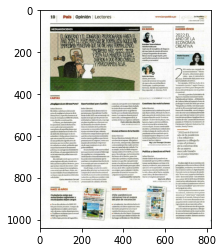

In [6]:
image_image_open = Image.open(f'A-IMAGE_{FILENAME}.jpg').convert("RGB")

# Print filename, size and class
print(f"Filename: A-IMAGE_{FILENAME}.jpg")
print(f"Size: {image_image_open.size}")
print(f"Class: {image_image_open.__class__}")

plt.imshow(image_image_open)

#### np.array

Filename: A-IMAGE_2022-01-03-p10.jpg
Shape: (1040, 820, 3)
Class: <class 'numpy.ndarray'>


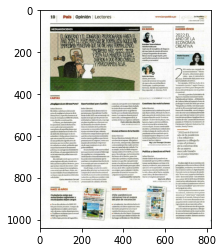

In [7]:
image_np_array = np.array(Image.open(f'A-IMAGE_{FILENAME}.jpg').convert("RGB"))

# Print filename, shape and class
print(f"Filename: A-IMAGE_{FILENAME}.jpg")
print(f"Shape: {image_np_array.shape}")
print(f"Class: {image_np_array.__class__}")

plt.imshow(image_np_array)

### Máscaras

#### RGB

Filename: A-RGB_2022-01-03-p10.png
Size: (820, 1040)
Class: <class 'PIL.Image.Image'>


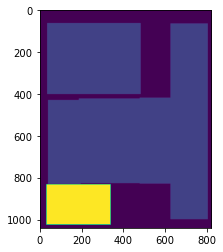

In [5]:
maskRGB_image_open = Image.open(f'A-RGB_{FILENAME}.png').convert("L")

# Print filename, size and class
print(f"Filename: A-RGB_{FILENAME}.png")
print(f"Size: {maskRGB_image_open.size}")
print(f"Class: {maskRGB_image_open.__class__}")

plt.imshow(maskRGB_image_open)

In [6]:
maskRGB_image_open.getcolors()

[(239846, 0), (553703, 29), (59251, 150)]

#### NPY

Filename: A-NPY_2022-01-03-p10.npy
Shape: (1040, 820)
Class: <class 'numpy.ndarray'>


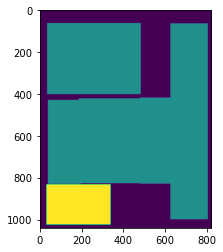

In [10]:
maskNPY_np_load = np.load(f'A-NPY_{FILENAME}.npy')

# Print filename, shape and class
print(f"Filename: A-NPY_{FILENAME}.npy")
print(f"Shape: {maskNPY_np_load.shape}")
print(f"Class: {maskNPY_np_load.__class__}")

plt.imshow(maskNPY_np_load)

In [11]:
maskNPY_np_load[1000][100], maskNPY_np_load[600][600], maskNPY_np_load[0][0]

(2, 1, 0)

In [12]:
# Value counts
unique, counts = np.unique(maskNPY_np_load, return_counts=True)
dict(zip(unique, counts))

{0: 239846, 1: 553703, 2: 59251}

#### SC

Filename: A-SC_2022-01-03-p10.png
Size: (820, 1040)
Class: <class 'PIL.Image.Image'>


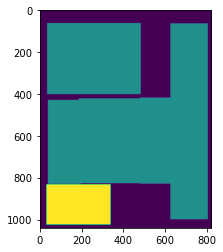

In [13]:
# sin convert       Ej: maskSC_image_open.getpixel((600, 600)) = 1
#.convert("L")      Ej: maskSC_image_open.getpixel((600, 600)) = 1
#.convert("RGB")    Ej: maskSC_image_open.getpixel((600, 600)) = (1,1,1)
maskSC_image_open = Image.open(f'A-SC_{FILENAME}.png').convert("L")

# Print filename, size and class
print(f"Filename: A-SC_{FILENAME}.png")
print(f"Size: {maskSC_image_open.size}")
print(f"Class: {maskSC_image_open.__class__}")

plt.imshow(maskSC_image_open)

In [14]:
maskSC_image_open.getpixel((100, 1000)), maskSC_image_open.getpixel((600, 600)), maskSC_image_open.getpixel((0, 0))

(2, 1, 0)

In [15]:
# Value counts
maskSC_image_open.getcolors()

[(239846, 0), (553703, 1), (59251, 2)]

Filename: A-SC_2022-01-03-p10.png
Shape: (1040, 820)
Class: <class 'numpy.ndarray'>


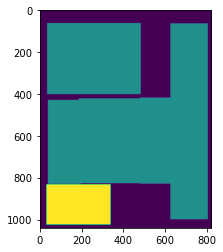

In [16]:
# sin convert       Ej: maskSC_np_array[600][600] = 1
#.convert("L")      Ej: maskSC_np_array[600][600] = 1
#.convert("RGB")    Ej: maskSC_np_array[600][600] = [1,1,1]
maskSC_np_array = np.array(Image.open(f'A-SC_{FILENAME}.png').convert("L"))

# Print filename, shape and class
print(f"Filename: A-SC_{FILENAME}.png")
print(f"Shape: {maskSC_np_array.shape}")
print(f"Class: {maskSC_np_array.__class__}")

plt.imshow(maskSC_np_array)

In [17]:
maskSC_np_array[1000][100], maskSC_np_array[600][600], maskSC_np_array[0][0]

(2, 1, 0)

In [18]:
# Value counts
unique, counts = np.unique(maskSC_np_array, return_counts=True)
dict(zip(unique, counts))

{0: 239846, 1: 553703, 2: 59251}

#### ONE

Filename: A-ONE_2022-01-03-p10.npy
Shape: (11, 1040, 820)
Class: <class 'numpy.ndarray'>


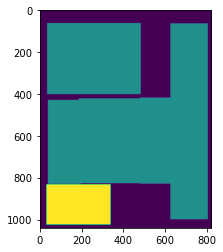

In [19]:
maskONE_np_load = np.load(f'A-ONE_{FILENAME}.npy')

# Print filename, shape and class
print(f"Filename: A-ONE_{FILENAME}.npy")
print(f"Shape: {maskONE_np_load.shape}")
print(f"Class: {maskONE_np_load.__class__}")

plt.imshow(np.argmax(maskONE_np_load, axis=0))

In [20]:
# Value counts of the maskONE
unique, counts = np.unique(np.argmax(maskONE_np_load, axis=0), return_counts=True)
dict(zip(unique, counts))


{0: 239846, 1: 553703, 2: 59251}

## Tranformaciones

#### Objetos

In [21]:
image_image_open = Image.open(f'A-IMAGE_{FILENAME}.jpg').convert("RGB")
image_np_array = np.array(Image.open(f'A-IMAGE_{FILENAME}.jpg').convert("RGB"))

maskRGB_image_open = Image.open(f'A-RGB_{FILENAME}.png').convert("RGB")
maskNPY_np_load = np.load(f'A-NPY_{FILENAME}.npy')
maskSC_image_open = Image.open(f'A-SC_{FILENAME}.png').convert("L")
maskONE_np_load = np.load(f'A-ONE_{FILENAME}.npy')


# Print name of the variable and class
print(f"Name: image_image_open      Class: {image_image_open.__class__}")
print(f"Name: image_np_array        Class: {image_np_array.__class__}")
print(f"\nName: maskRGB_image_open    Class: {maskRGB_image_open.__class__}")
print(f"Name: maskNPY_np_load       Class: {maskNPY_np_load.__class__}")
print(f"Name: maskSC_image_open     Class: {maskSC_image_open.__class__}")
print(f"Name: maskONE_np_load       Class: {maskONE_np_load.__class__}")

Name: image_image_open      Class: <class 'PIL.Image.Image'>
Name: image_np_array        Class: <class 'numpy.ndarray'>

Name: maskRGB_image_open    Class: <class 'PIL.Image.Image'>
Name: maskNPY_np_load       Class: <class 'numpy.ndarray'>
Name: maskSC_image_open     Class: <class 'PIL.Image.Image'>
Name: maskONE_np_load       Class: <class 'numpy.ndarray'>


#### Transformación

In [22]:
from torchvision import transforms
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Torchvision
tv_t = transforms.Compose([
    transforms.Resize((256, 256)), # modificar a 512
    
    transforms.ToTensor(),
])
tv_t_norm = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

# Albumentations
al_t = A.Compose([
    A.Resize(256,256),
    ToTensorV2()
])
al_t_norm = A.Compose([
    A.Resize(256,256),
    A.augmentations.transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    ToTensorV2()
])

In [29]:
def print_details(string, object):
    
    print(f"  {string} Class: {object.__class__}")

    try:
        print(f"  {string} Shape: {object.shape}")
    except:
        print(f"  {string} Size: {object.size}")

    # If string is mask, consider object is torch.Tensor to print unique values
    if string == "Mask":

        # torch.Size([256, 256, 3])
        if object.shape == torch.Size([256, 256, 3]):
            unique_values = torch.unique(object.reshape(-1, 3), dim=0)

        # torch.Size([3, 256, 256])
        if object.shape == torch.Size([3, 256, 256]):
            unique_values = torch.unique(object.reshape(3, -1), dim=1)

        # torch.Size([1, 256, 256])
        if object.shape == torch.Size([1, 256, 256]):
            unique_values = torch.unique(object)

        # torch.Size([256, 256])
        if object.shape == torch.Size([256, 256]):
            unique_values = torch.unique(object)
        
        # Print how much memory this tensor is using in Mb
        print(f"  {string} Memory: {object.element_size() * object.nelement() / 1024 / 1024} Mb")

        # Print the unique values
        print(f"  {string} Unique values: {unique_values}")

In [24]:
def mask_value_counts(mask_selected):
    try:
        print(mask_selected.getcolors())
    except:
        try:

            if maskONE_np_load.shape == mask_selected.shape:
                mask_selected = np.argmax(mask_selected, axis=0)

            unique, counts = np.unique(mask_selected, return_counts=True)
            print(dict(zip(unique, counts)))

        except:
            print("Error: mask_value_counts")

In [35]:
def transform_test(image_selected, mask_selected):

    print("Mask value counts before Transformation")
    mask_value_counts(mask_selected)
    print(mask_selected.__class__)

    print(f"\n=============================================================")
    print(f"TORCHVISION")
    print(f"=============================================================")
    # Test [tv_t] v1
    try:
        image = tv_t(image_selected)
        mask = tv_t(mask_selected)

        print("Test [tv_t] v1: Passed")

        # Details of image and mask
        print_details('Image', image)
        print_details('Mask', mask)

    except:
        print("Test [tv_t] v1: Failed")

    # Test [tv_t] v2
    try:
        image = np.array(image_selected)
        mask = np.array(mask_selected)

        image = tv_t(image)
        mask = tv_t(mask)

        print("Test [tv_t] v2: Passed")

        # Details of image and mask
        print_details('Image', image)
        print_details('Mask', mask)

    except:
        print("Test [tv_t] v2: Failed")

    # Test [tv_t_norm] v1
    try:
        image = tv_t_norm(image_selected)
        mask = tv_t_norm(mask_selected)

        print("Test [tv_t_norm] v1: Passed")

        # Details of image and mask
        print_details('Image', image)
        print_details('Mask', mask)
    except:
        print("Test [tv_t_norm] v1: Failed")

    # Test [tv_t_norm] v2
    try:
        image = np.array(image_selected)
        mask = np.array(mask_selected)

        image = tv_t_norm(image)
        mask = tv_t_norm(mask)

        print("Test [tv_t_norm] v2: Passed")

        # Details of image and mask
        print_details('Image', image)
        print_details('Mask', mask)
    except:
        print("Test [tv_t_norm] v2: Failed")

    print(f"\n=============================================================")
    print(f"ALBUMENTATIONS")
    print(f"=============================================================")
    # Test [al_t] v1
    try:
        aug = al_t(image=image_selected, mask=mask_selected)

        image = aug['image']
        mask = aug['mask']

        print("Test [al_t] v1: Passed")

        # Details of image and mask
        print_details('Image', image)
        print_details('Mask', mask)
    except:
        print("Test [al_t] v1: Failed")

    # Test [al_t] v2
    try:

        image = np.array(image_selected)
        mask = np.array(mask_selected)

        aug = al_t(image=image, mask=mask)

        image = aug['image']
        mask = aug['mask']

        print("Test [al_t] v2: Passed")

        # Details of image and mask
        print_details('Image', image)
        print_details('Mask', mask)
    except:
        print("Test [al_t] v2: Failed")

    # Test [al_t_norm] v1
    try:
        aug = al_t_norm(image=image_selected, mask=mask_selected)

        image = aug['image']
        mask = aug['mask']

        print(f"Test [al_t_norm] v1: Passed")

        # Details of image and mask
        print_details('Image', image)
        print_details('Mask', mask)
    except:
        print("Test [al_t_norm] v1: Failed")

    # Test [al_t_norm] v2
    try:

        image = np.array(image_selected)
        mask = np.array(mask_selected)

        aug = al_t_norm(image=image, mask=mask)

        image = aug['image']
        mask = aug['mask']

        print(f"Test [al_t_norm] v2: Passed")

        # Details of image and mask
        print_details('Image', image)
        print_details('Mask', mask)
    except:
        print("Test [al_t_norm] v2: Failed")

In [36]:
# Testing

image_selected = image_image_open # image_image_open, image_np_array

mask_selected = maskRGB_image_open # maskRGB_image_open, maskNPY_np_load, maskSC_image_open, maskONE_np_load

print(f"File: {FILENAME}\n")

transform_test(image_selected, mask_selected)

File: 2022-01-03-p10

Mask value counts before Transformation
[(59251, (0, 255, 0)), (553703, (0, 0, 255)), (239846, (0, 0, 0))]
<class 'PIL.Image.Image'>

TORCHVISION
Test [tv_t] v1: Passed
  Image Class: <class 'torch.Tensor'>
  Image Shape: torch.Size([3, 256, 256])
  Mask Class: <class 'torch.Tensor'>
  Mask Shape: torch.Size([3, 256, 256])
  Mask Memory: 0.75 Mb
  Mask Unique values: tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 